In [1]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('.')

g_calctype="asa"
g_polytype="fcc"


In [2]:
from hea4f3 import Hea4Feature3data
g_hea4 = Hea4Feature3data(g_calctype)

index to delete [14954, 14955, 35634, 35635, 103578, 103579, 119432, 119433, 144840, 144841]
len(bcc) 73494 hen(fcc) 73494


In [7]:
from Common import load_save_pickle

In [8]:
status, g_df_calc_polytype_loaded = load_save_pickle("df_{}_{}.pickle".format(g_calctype, g_polytype),
                                                None, action=None)

status, g_df_calc_polytype_loaded.shape

('loaded', (73494, 88))

In [9]:
def add_existed(df, hea4, calctype="asa"):
    _df = hea4.add_element_existence_columns(df)
    return _df

g_df_calc_polytype_loaded = add_existed(g_df_calc_polytype_loaded, g_hea4, g_calctype)
g_df_calc_polytype_loaded.shape

(73494, 191)

In [10]:
g_df_calc_polytype = g_df_calc_polytype_loaded

In [11]:
g_df_moment_zero = g_df_calc_polytype.query(g_hea4.querystr_by_local_moment())
g_df_moment_nonzero = g_df_calc_polytype.query(g_hea4.querystr_by_local_moment(add_not=True))

abs(moment1) < 0.01 and abs(moment2) < 0.01 and abs(moment3) < 0.01 and abs(moment4) < 0.01
not (abs(moment1) < 0.01 and abs(moment2) < 0.01 and abs(moment3) < 0.01 and abs(moment4) < 0.01)


(0.0, 100.0)

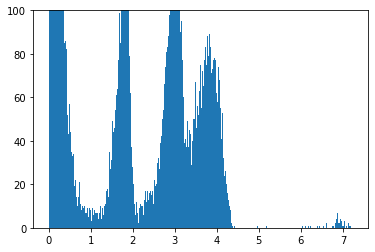

In [12]:
import numpy as np
g_local_moments = np.abs(g_df_moment_nonzero[g_hea4.local_moment_columns].values)
plt.hist(g_local_moments.ravel(), bins=1000)
plt.ylim((0,100))

In [13]:
g_df_moment_large = g_df_calc_polytype.query(g_hea4.querystr_by_local_moment(and_or="or",
                                                                             compare_op=">", mag_value=5))
"shape", g_df_moment_large.shape

abs(moment1) > 5 or abs(moment2) > 5 or abs(moment3) > 5 or abs(moment4) > 5


('shape', (134, 191))

In [14]:
from pymatgen.core import Element
def make_composite_name(df, all_element_list):

    composite_name_list = []
    for elements in df[all_element_list].values:
        symbol_list = []
        for z in elements:
            elm = Element("H").from_Z(z)
            symbol_list.append(str(elm))
        composite_name_list.append("".join(symbol_list))
    return composite_name_list

composite_name_list = make_composite_name(g_df_moment_large, g_hea4.element_columns)
composite_name_list

['AlSiHfTl',
 'AlMnHfPb',
 'AlCoHfPb',
 'AlGeInHf',
 'AlRhHfBi',
 'AlPdHfBi',
 'AlSnHfAu',
 'AlHfHgTl',
 'SiMnInHf',
 'SiMnSnHf',
 'SiFeInHf',
 'SiCoHfBi',
 'SiGaGeHf',
 'SiGaHfTl',
 'SiGeHfAu',
 'SiGeHfHg',
 'SiRuSnHf',
 'SiRhHfBi',
 'SiPdHfTl',
 'SiPdHfBi',
 'SiAgHfTl',
 'SiCdHfTl',
 'SiHfTaTl',
 'SiHfOsBi',
 'ScCrSnHf',
 'ScCrHfTl',
 'ScNiSnHf',
 'ScNiHfTl',
 'ScSnHfRe',
 'ScHfReTl',
 'ScHfIrTl',
 'ScHfPtTl',
 'ScHfAuHg',
 'ScHfAuTl',
 'TiCoHfPb',
 'TiZnHfTl',
 'TiTcHfPb',
 'TiHfHgTl',
 'VGeHfHg',
 'VRhHfTl',
 'VPdHfPb',
 'CrGaHfTl',
 'CrPdHfPb',
 'CrAgHfPb',
 'CrHfPtPb',
 'MnZnHfPb',
 'MnGeHfHg',
 'MnYHfW',
 'MnHfAuPb',
 'MnHfHgTl',
 'FeGaHfBi',
 'FeRuHfPb',
 'FeInHfTl',
 'FeHfHgTl',
 'FeHfHgBi',
 'CoZnHfBi',
 'CoGaHfBi',
 'CoGeInHf',
 'CoGeHfHg',
 'CoGeHfBi',
 'CoSnHfHg',
 'CoHfHgTl',
 'NiGaHfBi',
 'NiGeHfBi',
 'NiSnHfHg',
 'NiSnHfTl',
 'CuZnHfPb',
 'CuZnHfBi',
 'CuGaHfBi',
 'CuGeSnHf',
 'CuCdHfBi',
 'CuInHfTl',
 'CuSnHfHg',
 'CuHfWPb',
 'CuHfRePb',
 'ZnGaSnHf',
 'ZnYTcHf',
 'ZnNb